In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
# Get the dataset from the given link
!wget "https://drive.google.com/uc?export=download&id=1abSLIIPVkgmZW8Cx3vohIlHk16gJmuvO" -O healthcare_dataset.csv

--2023-12-10 14:38:32--  https://drive.google.com/uc?export=download&id=1abSLIIPVkgmZW8Cx3vohIlHk16gJmuvO
Resolving drive.google.com (drive.google.com)... 74.125.196.100, 74.125.196.101, 74.125.196.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/75c860jg85crosn91m49h9n0hrq26frg/1702219050000/01442500710412781851/*/1abSLIIPVkgmZW8Cx3vohIlHk16gJmuvO?e=download&uuid=f2cd7efe-d0ec-4018-959e-86fb353ce929 [following]
--2023-12-10 14:38:32--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/75c860jg85crosn91m49h9n0hrq26frg/1702219050000/01442500710412781851/*/1abSLIIPVkgmZW8Cx3vohIlHk16gJmuvO?e=download&uuid=f2cd7efe-d0ec-4018-959e-86fb353ce929
Resolving doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com)... 173.194.211.132, 2607

In [ ]:
# Get the dataset and load it into 'df'
df=pd.read_csv('healthcare_dataset.csv')

#Data Exploration

In [ ]:
# Display the first few rows of the dataset
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
# Check the number of rows and columns of the dataset
df.shape

(10000, 15)

In [ ]:
# Display the column names in the dataset
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [ ]:
# Display concise summary information about the DataFrame
df.info

<bound method DataFrame.info of                       Name  Age  Gender Blood Type Medical Condition  \
0          Tiffany Ramirez   81  Female         O-          Diabetes   
1              Ruben Burns   35    Male         O+            Asthma   
2                Chad Byrd   61    Male         B-           Obesity   
3        Antonio Frederick   49    Male         B-            Asthma   
4      Mrs. Brandy Flowers   51    Male         O-         Arthritis   
...                    ...  ...     ...        ...               ...   
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patr

In [ ]:
# Information about the columns, their data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
# Count the occurrences of each value in the 'Test Results' column, which is the target variable
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

## Feature Extraction

In [ ]:
# Convert date columns to datetime format if needed
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Calculate the difference in days between the two columns
df['Days Gap'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Display data with the new 'selisih_hari' column
df_1 = df.drop(['Date of Admission', 'Discharge Date'], axis=1)

df_1.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Days Gap
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,24


## Correlation

<ipython-input-34-f38aaaec3e8f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()


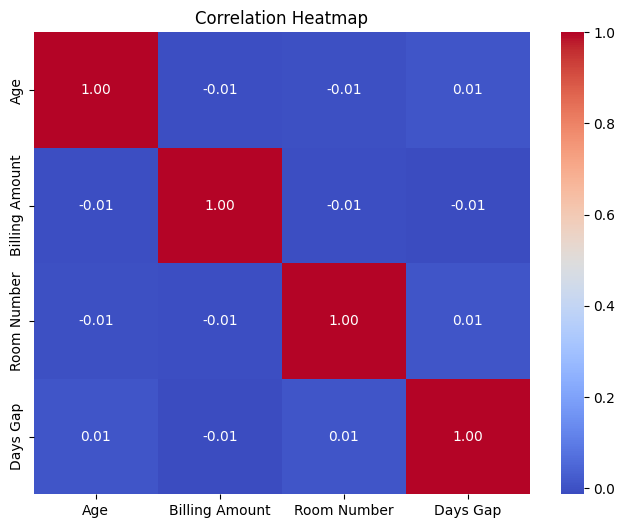

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_1.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

No correlation among the numeric data

#Data Preprocessing

##Separate Target

In [ ]:
X = df_1.drop(['Test Results'], axis=1) #the other features beside target
y = df_1['Test Results'] #target

##Split Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

###Check Missing Values in Data Training and Testing

In [ ]:
# Check missing values in training data
missing_values_train = X_train.isnull().sum()

# Check missing values in testing data
missing_values_test = X_test.isnull().sum()

print("Missing values in training data:")
print(missing_values_train)

print("\nMissing values in testing data:")
print(missing_values_test)


Missing values in training data:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Days Gap              0
dtype: int64

Missing values in testing data:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Days Gap              0
dtype: int64


###Check Outliers in Data Training and Testing using Boxplot

<Axes: >

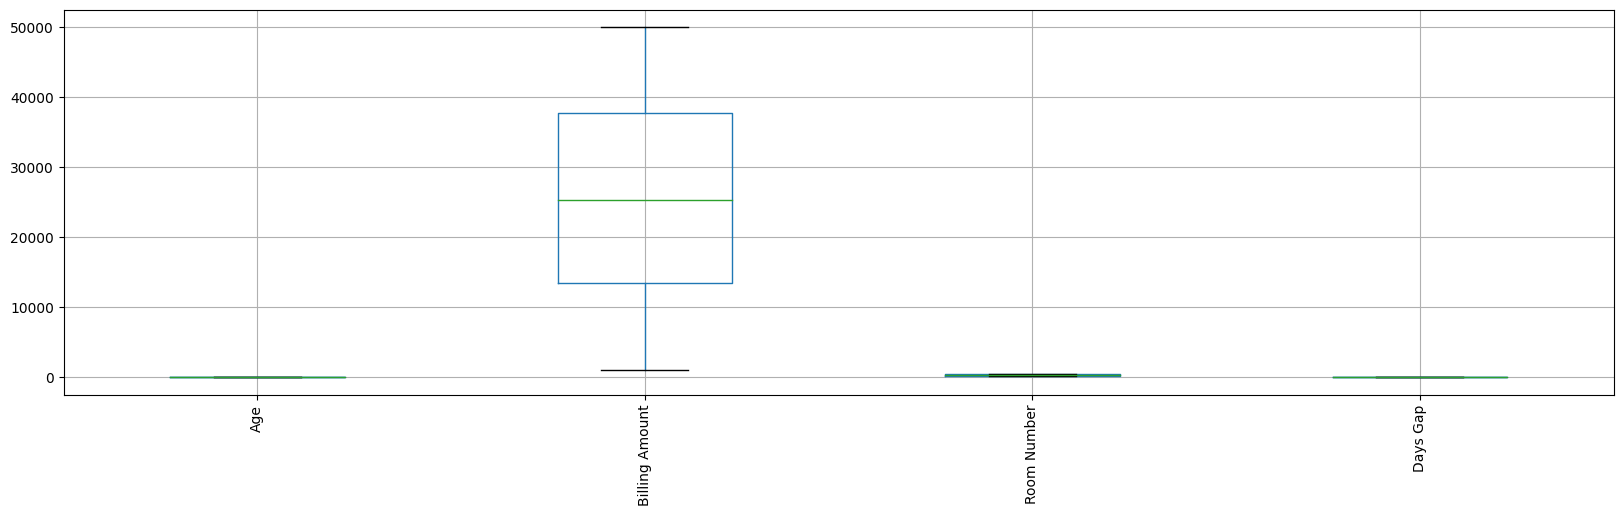

In [ ]:
df.boxplot(figsize=(20,5), rot=90)

<Axes: >

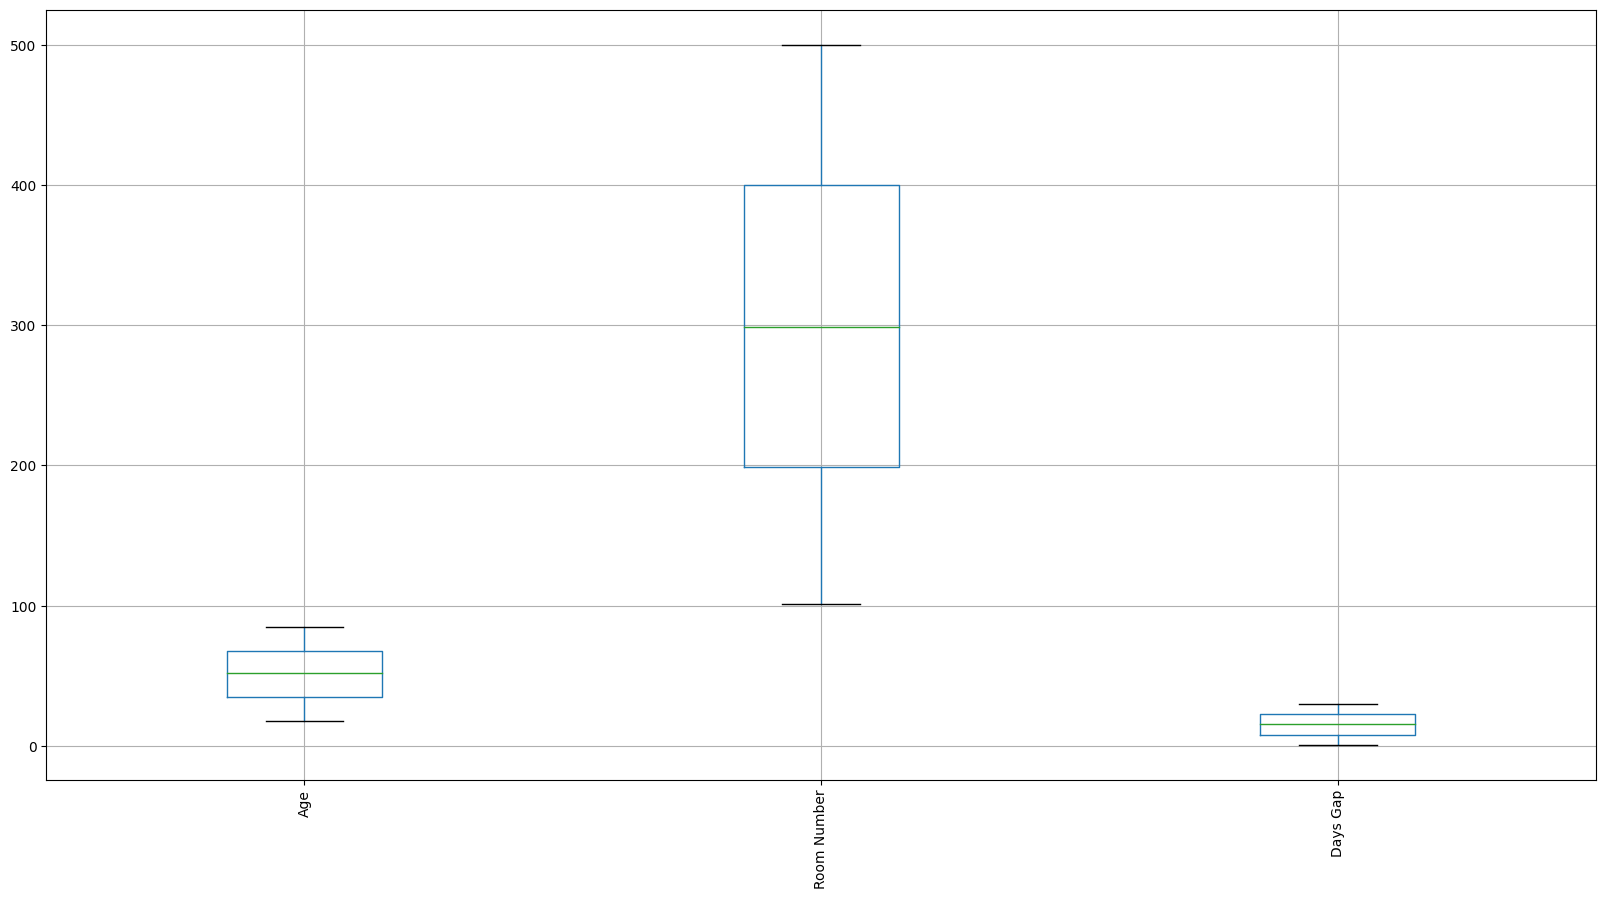

In [ ]:
df.drop('Billing Amount', axis = 1).boxplot(figsize=(20,10), rot=90)

#Feature Engineering

## Encoding

###Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert all values in the 'Name' column to string data type
X_train['Name'] = X_train['Name'].astype(str)
X_test['Name'] = X_test['Name'].astype(str)

# Create a LabelEncoder for the 'Name' column using combined data from training and testing
label_encoder = LabelEncoder()

# Combine training and testing data
combined_data = pd.concat([X_train['Name'], X_test['Name']], axis=0)
label_encoder.fit(combined_data)

# Encode the training and testing data for the 'Name' column using the same encoder
X_train['Name'] = label_encoder.transform(X_train['Name'])
X_test['Name'] = label_encoder.transform(X_test['Name'])

In [ ]:
# Display the first few rows of the encoded data
X_train.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Days Gap
9216,5872,44,Female,B-,Asthma,Nancy Davidson,Atkinson-Johnson,Aetna,28900.615874,292,Elective,Penicillin,8
7324,4417,30,Male,O-,Cancer,Mary Wilson,Schultz-Jones,Medicare,40461.419916,346,Urgent,Lipitor,8
918,5968,74,Male,B+,Hypertension,Ronald Taylor,"Perez, Ray and Combs",Blue Cross,2936.565609,172,Emergency,Ibuprofen,18
5902,4249,83,Female,A+,Hypertension,Tyler Foster,Williamson-Hernandez,Aetna,22777.106392,477,Elective,Lipitor,9
2807,3970,46,Female,O+,Diabetes,James Brandt,Hughes LLC,UnitedHealthcare,11962.537331,227,Elective,Lipitor,12


In [ ]:
# Display the first few rows of the encoded data
X_test.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Days Gap
2656,6432,32,Female,A+,Cancer,Stephen Cook,"Monroe, Allen and Welch",Aetna,49243.317363,155,Urgent,Paracetamol,21
445,302,54,Male,AB+,Obesity,Jennifer Carlson,"Cook, White and Davis",Blue Cross,1926.881278,485,Urgent,Penicillin,24
9505,395,51,Male,O-,Hypertension,Amy Daniels,Alvarez-Taylor,Blue Cross,28162.980371,395,Elective,Paracetamol,13
332,1819,83,Female,O+,Hypertension,Cory Fletcher,Hernandez-Mendoza,UnitedHealthcare,37744.299585,471,Elective,Aspirin,1
4168,2032,85,Male,O-,Obesity,Taylor Gardner,Burke-Mendoza,Cigna,1889.902251,201,Elective,Paracetamol,16


###One Hot Encoding

In [ ]:
# List of columns to be one-hot encoded
one_hot_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']

# Combining training and testing data
combined_data = pd.concat([X_train, X_test], axis=0)

# Performing one-hot encoding on the combined data
combined_data_encoded = pd.get_dummies(combined_data, columns=one_hot_cols)

# Splitting the encoded data back into training and testing datasets
X_train_encoded = combined_data_encoded.loc[X_train.index, :]
X_test_encoded = combined_data_encoded.loc[X_test.index, :]

In [ ]:
# Display the first few rows of the encoded data
X_train_encoded.head()

,Name,Age,Billing Amount,Room Number,Days Gap,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
9216,5872,44,28900.615874,292,8,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7324,4417,30,40461.419916,346,8,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
918,5968,74,2936.565609,172,18,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5902,4249,83,22777.106392,477,9,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2807,3970,46,11962.537331,227,12,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [ ]:
# Display the first few rows of the encoded data
X_test_encoded.head()

,Name,Age,Billing Amount,Room Number,Days Gap,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
2656,6432,32,49243.317363,155,21,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
445,302,54,1926.881278,485,24,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
9505,395,51,28162.980371,395,13,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
332,1819,83,37744.299585,471,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
4168,2032,85,1889.902251,201,16,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


###Standar Scaler for Numerical Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns for scaling
numeric_cols = ['Age', 'Billing Amount', 'Room Number', 'Days Gap']

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the training data
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])

# Scaling the testing data
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


### Random Forest

####By Default

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier with default parameters
clf_default = RandomForestClassifier(random_state=123)

# Fit the Random Forest classifier with encoded training data
clf_default.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.metrics import classification_report

# Predict using the encoded testing data
y_pred = clf_default.predict(X_test_encoded)

# Evaluate the model before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.35      0.49      0.41       691
Inconclusive       0.31      0.27      0.29       637
      Normal       0.30      0.22      0.25       672

    accuracy                           0.33      2000
   macro avg       0.32      0.33      0.32      2000
weighted avg       0.32      0.33      0.32      2000



####Tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [1, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing the Random Forest model
clf = RandomForestClassifier(random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with encoded training data
grid_search.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 5],
                         'n_estimators': [50, 150]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report

# Get the best Gradient Random Forest classifier model
best_rf = grid_search.best_estimator_

# Predict using the best Stacking Classifier model and encoded testing data
y_pred = best_rf.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.34      0.97      0.51       691
Inconclusive       0.24      0.01      0.02       637
      Normal       0.21      0.00      0.01       672

    accuracy                           0.34      2000
   macro avg       0.27      0.33      0.18      2000
weighted avg       0.27      0.34      0.19      2000



###Bagging

####By Default

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Bagging classifier with default parameters
bagging_default = BaggingClassifier(random_state=123)

# Fit the Bagging classifier with encoded training data
bagging_default.fit(X_train_encoded, y_train)

BaggingClassifier(random_state=123)

In [ ]:
from sklearn.metrics import classification_report

# Predict using the encoded testing data
y_pred = bagging_default.predict(X_test_encoded)

# Evaluate the model before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.36      0.45      0.40       691
Inconclusive       0.29      0.29      0.29       637
      Normal       0.36      0.26      0.30       672

    accuracy                           0.34      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.34      0.34      0.33      2000



####Tuning

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearchCV
param_grid = {
    'n_estimators': [5, 20],
    'max_samples': [0.5, 2.0],
    'max_features': [0.5, 2.0],
    'bootstrap_features': [True, False]
}

# Initialize the Bagging classifier
bagging_tuned = BaggingClassifier(random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bagging_tuned, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV with encoded training data
grid_search.fit(X_train_encoded, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py", line 326, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=123),
             param_grid={'bootstrap_features': [True, False],
                         'max_features': [0.5, 2.0], 'max_samples': [0.5, 2.0],
                         'n_estimators': [5, 20]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report

# Get the best Gradient Bagging classifier model
best_bagging = grid_search.best_estimator_

# Predict using the best Stacking Classifier model and encoded testing data
y_pred = best_bagging.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.33      0.47      0.39       691
Inconclusive       0.29      0.28      0.29       637
      Normal       0.34      0.20      0.25       672

    accuracy                           0.32      2000
   macro avg       0.32      0.32      0.31      2000
weighted avg       0.32      0.32      0.31      2000



###Boosting

####By Default

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier with default parameters
gb_default = GradientBoostingClassifier(random_state=123)

# Fit the Gradient Boosting classifier with encoded training data
gb_default.fit(X_train_encoded, y_train)

GradientBoostingClassifier(random_state=123)

In [ ]:
from sklearn.metrics import classification_report

# Predict using the encoded testing data
y_pred = gb_default.predict(X_test_encoded)

# Evaluate the model before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.34      0.81      0.48       691
Inconclusive       0.34      0.10      0.16       637
      Normal       0.34      0.08      0.13       672

    accuracy                           0.34      2000
   macro avg       0.34      0.33      0.26      2000
weighted avg       0.34      0.34      0.26      2000



####Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.5],
    'max_depth': [2, 5]
}

# Initialize the Gradient Boosting classifier
gb_tuned = GradientBoostingClassifier(random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_tuned, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV with encoded training data
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.5], 'max_depth': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report

# Get the best Gradient Boosting classifier model
best_gb = grid_search.best_estimator_

# Predict using the best Stacking Classifier model and encoded testing data
y_pred = best_gb.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.35      0.86      0.49       691
Inconclusive       0.34      0.05      0.09       637
      Normal       0.35      0.09      0.15       672

    accuracy                           0.35      2000
   macro avg       0.35      0.34      0.24      2000
weighted avg       0.35      0.35      0.25      2000



###Stacking

####By Default

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the base estimators
estimators = [
    ('lr', LogisticRegression(random_state=123)),
    ('dt', DecisionTreeClassifier(random_state=123)),
    ('rf', RandomForestClassifier(random_state=123))
]

# Initialize the Stacking Classifier with default parameters
stack_default = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the Stacking Classifier with encoded training data
stack_default.fit(X_train_encoded, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=123)),
                               ('dt', DecisionTreeClassifier(random_state=123)),
                               ('rf',
                                RandomForestClassifier(random_state=123))],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import classification_report

# Predict using the encoded testing data
y_pred = stack_default.predict(X_test_encoded)

# Evaluate the model before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.34      0.69      0.45       691
Inconclusive       0.30      0.24      0.27       637
      Normal       0.26      0.03      0.06       672

    accuracy                           0.32      2000
   macro avg       0.30      0.32      0.26      2000
weighted avg       0.30      0.32      0.26      2000



####Tuning

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters for GridSearchCV for the final estimator
param_grid = {
    'final_estimator__C': [0.1, 1, 10]
}

# Initialize the Stacking Classifier
stack_tuned = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=stack_tuned, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV with encoded training data
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('lr',
                                                       LogisticRegression(random_state=123)),
                                                      ('dt',
                                                       DecisionTreeClassifier(random_state=123)),
                                                      ('rf',
                                                       RandomForestClassifier(random_state=123))],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1, 10]},
             scoring='accuracy')

In [ ]:
from sklearn.metrics import classification_report

# Get the best Stacking Classifier model
best_stack = grid_search.best_estimator_

# Predict using the best Stacking Classifier model and encoded testing data
y_pred = best_stack.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Abnormal       0.34      0.72      0.46       691
Inconclusive       0.31      0.23      0.27       637
      Normal       0.26      0.02      0.04       672

    accuracy                           0.33      2000
   macro avg       0.30      0.32      0.25      2000
weighted avg       0.30      0.33      0.26      2000

